In [24]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler


#데이터 분할
from sklearn.model_selection import train_test_split
#LightGBM 패키지 불러오기
from lightgbm import LGBMClassifier

#변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

from subprocess import call
from IPython.display import Image
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,recall_score, f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

from scipy.stats import chi2_contingency

%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
#-기호 false다
matplotlib.rc('axes',unicode_minus = False)

In [25]:
df_main_para = pd.read_csv("/home/piai/다운로드/All (이상치_결측치 처리_patt추가) (사본).csv", encoding='utf-8')
df_main_para


,Unnamed: 0,No_Die,process,Ox_Chamber,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,...,Furance_Temp,RTA_Temp,process4.1,Target,Error_message,Lot_Num,Wafer_Num,Datetime,path,short_path
0,0,NOLSM325131325,Oxidation,2,dry,1214.307948,O2,26.69,0.203,120,...,854,154,Inspect,141,none,13,28,01-03-2022,21111,2111
1,1,NOLSM326132326,Oxidation,2,dry,978.110792,O2,30.86,0.217,137,...,895,156,Inspect,55,none,13,29,01-03-2022,21122,2112
2,2,NOLSM327133327,Oxidation,2,dry,1176.019149,O2,31.07,0.218,116,...,898,152,Inspect,96,none,13,30,01-03-2022,21133,2113
3,3,NOLSM328134328,Oxidation,2,dry,933.442733,O2,31.04,0.196,143,...,879,155,Inspect,105,none,13,31,01-03-2022,21111,2111
4,4,NOLSM329135329,Oxidation,2,wet,1140.598752,H2O,31.37,0.215,76,...,882,155,Inspect,79,none,13,32,01-03-2022,21122,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,1663,NOLSM8483211,Oxidation,3,wet,1275.182502,H2O,45.10,0.214,21,...,868,152,Inspect,78,none,32,11,28-02-2022,33333,3333
1664,1664,NOLSM8493212,Oxidation,1,wet,1268.105427,H2O,45.07,0.215,22,...,867,152,Inspect,42,none,32,12,28-02-2022,11133,1113
1665,1665,NOLSM8503213,Oxidation,1,wet,1279.160563,H2O,45.12,0.214,21,...,868,152,Inspect,42,none,32,13,28-02-2022,11222,1122
1666,1666,NOLSM8513214,Oxidation,1,wet,1272.804948,H2O,45.34,0.213,20,...,868,152,Inspect,24,none,32,14,28-02-2022,11311,1131


In [26]:
df_main_para.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1668 non-null   int64  
 1   No_Die               1668 non-null   object 
 2   process              1668 non-null   object 
 3   Ox_Chamber           1668 non-null   int64  
 4   type                 1668 non-null   object 
 5   Temp_OXid            1668 non-null   float64
 6   Vapor                1668 non-null   object 
 7   ppm                  1668 non-null   float64
 8   Pressure             1668 non-null   float64
 9   Oxid_time            1668 non-null   int64  
 10  thickness            1668 non-null   float64
 11  process 2            1668 non-null   object 
 12  photo_soft_Chamber   1668 non-null   int64  
 13  resist_target        1668 non-null   float64
 14  N2_HMDS              1668 non-null   float64
 15  pressure_HMDS        1668 non-null   f

In [27]:
df_main_para['Target'] = np.where(df_main_para['Target'] >= 195, 0, 1)
df_main_para['Target'].value_counts()

1    1547
0     121
Name: Target, dtype: int64

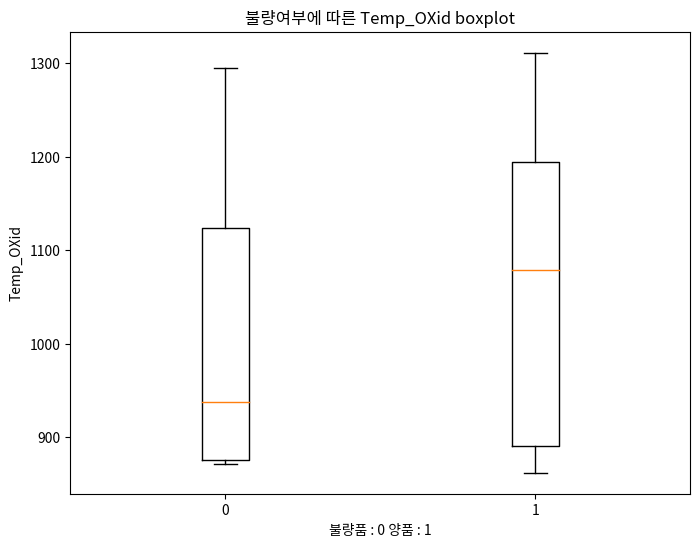

In [28]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['Temp_OXid']
data_1 = df_main_para[df_main_para['Target'] == 1]['Temp_OXid']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('Temp_OXid')
plt.title('불량여부에 따른 Temp_OXid boxplot')
plt.show()


# Temp_Oxid : 공정이 수행되는 동안 Chanmber 내 평균 온도 
# 양품의 범위 : 862.01 ~ 1311.23 
# 불량품의 범위 : 871.01 ~ 1294.52 
# Insight : ?

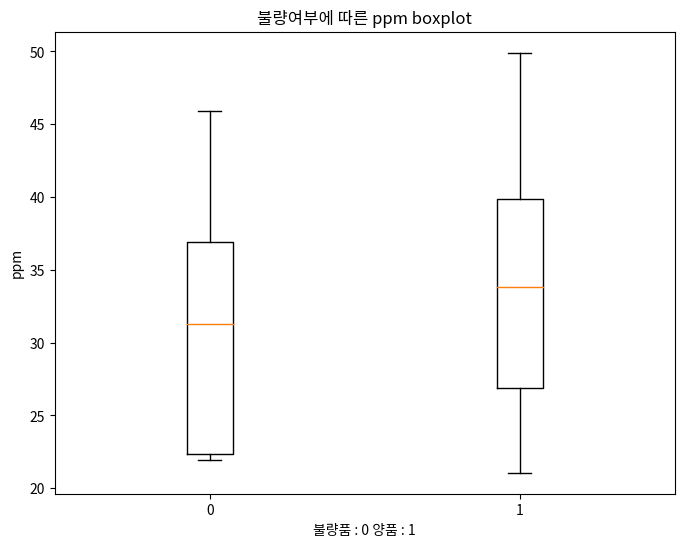

In [35]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['ppm']
data_1 = df_main_para[df_main_para['Target'] == 1]['ppm']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('ppm')
plt.title('불량여부에 따른 ppm boxplot')
plt.show()
# ppm : 공정에 투여되는 합성물의 량
# 양품의 범위 : 21.07 ~ 49.91 
# 불량품의 범위 : 21.94 ~ 45.88 
# Insight : 합성물의 양을 45.89이상 49.91이하로 조절한다.  

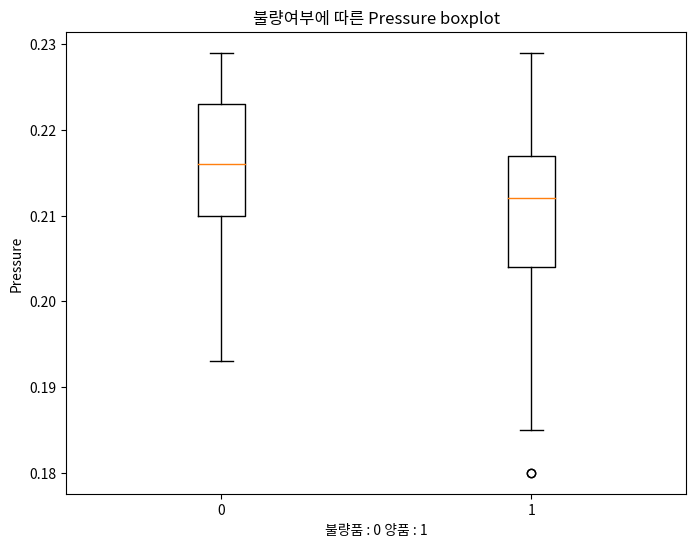

In [39]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['Pressure']
data_1 = df_main_para[df_main_para['Target'] == 1]['Pressure']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('Pressure')
plt.title('불량여부에 따른 Pressure boxplot')
plt.show()

# Pressure : 공정이 진행되는 동안 공정에 가해지는 압력
# 양품의 범위 : 0.18 ~ 0.229 
# 불량품의 범위 : 0.193 ~ 0.229 
# Insight : 

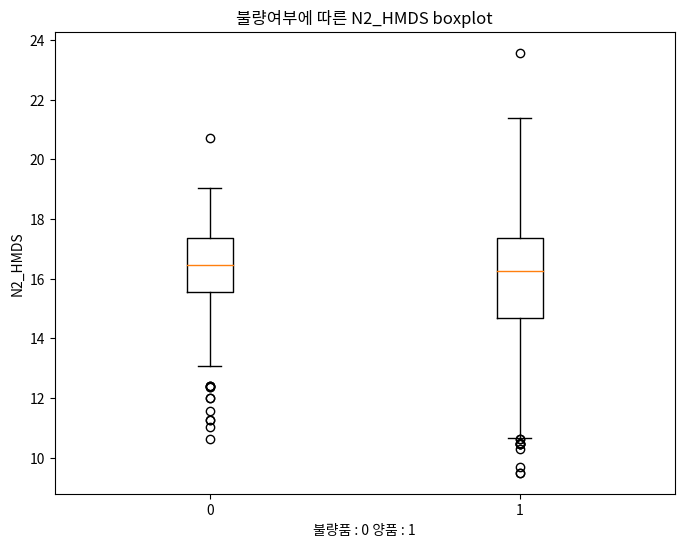

In [42]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['N2_HMDS']
data_1 = df_main_para[df_main_para['Target'] == 1]['N2_HMDS']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('N2_HMDS')
plt.title('불량여부에 따른 N2_HMDS boxplot')
plt.show()
# B2_HMDS : HMDS 공정에서 N2 질소의 투여량
# 양품의 범위 : 9.497 ~ 23.573 
# 불량품의 범위 : 10.637 ~ 20.701 
# Insight : 투여되는 질소의 양이 양품인 생산품보다 적게 투여되는 경우가 많으므로 투여되는 질소의 양을 23.573ppm까지
#           증가시킨다.

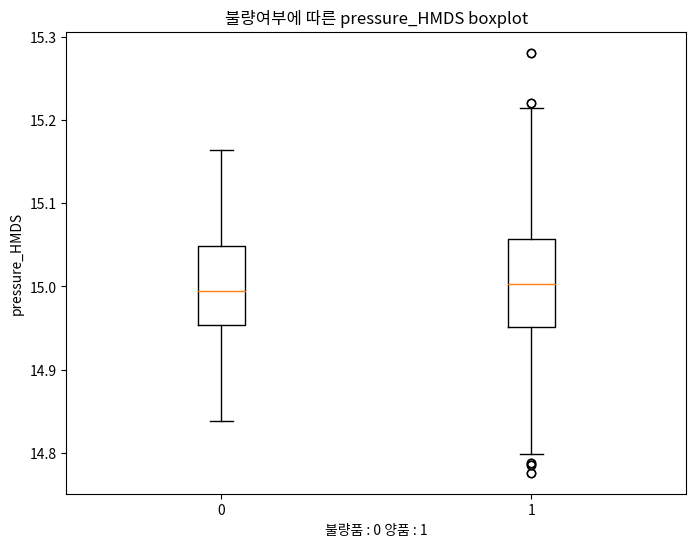

In [191]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['pressure_HMDS']
data_1 = df_main_para[df_main_para['Target'] == 1]['pressure_HMDS']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('pressure_HMDS')
plt.title('불량여부에 따른 pressure_HMDS boxplot')
plt.show()

# pressure_HMDS : HMDS 공정에서 N2 산화물 생성시 가해지는 압력
# 양품의 범위 : 14.776 ~ 15.281   
# 불량품의 범위 : 14.838 ~ 15.164 
# Insight : ?

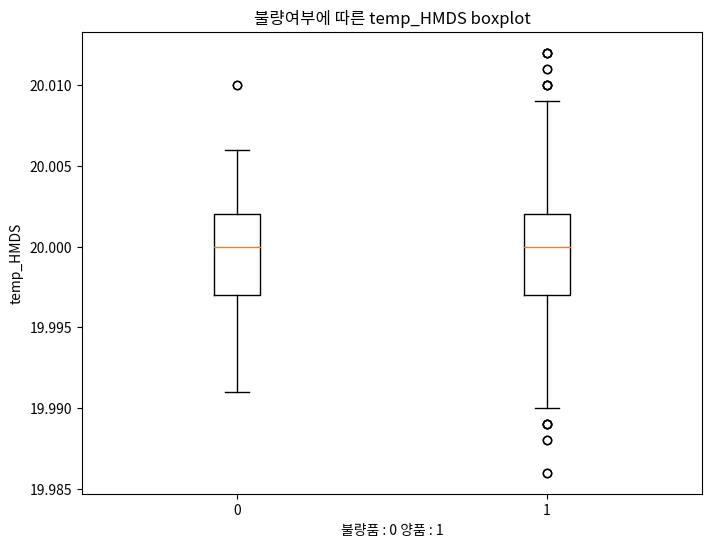

In [192]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['temp_HMDS']
data_1 = df_main_para[df_main_para['Target'] == 1]['temp_HMDS']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('temp_HMDS')
plt.title('불량여부에 따른 temp_HMDS boxplot')
plt.show()

# temp_HMDS : HMDS 공정에서 N2 산화물 생성시 가해지는 온도
# 양품의 범위 : 19.986 ~ 20.012   
# 불량품의 범위 : 19.991 ~ 20.01 
# Insight : .

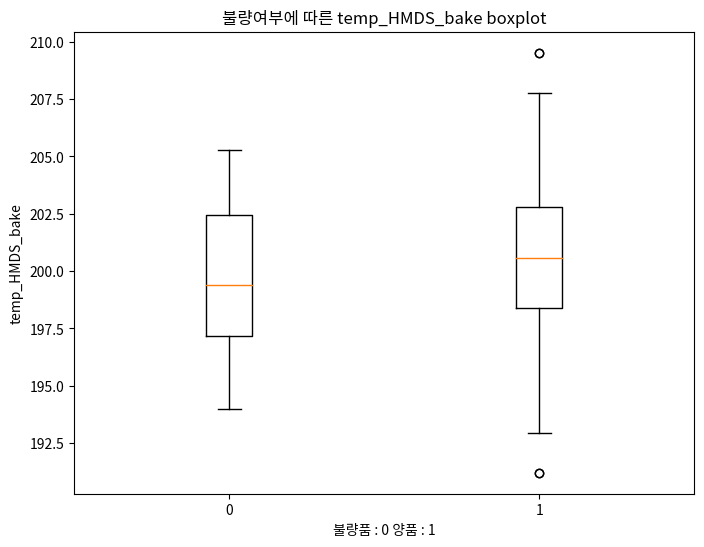

In [193]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['temp_HMDS_bake']
data_1 = df_main_para[df_main_para['Target'] == 1]['temp_HMDS_bake']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('temp_HMDS_bake')
plt.title('불량여부에 따른 temp_HMDS_bake boxplot')
plt.show()

# temp_HMDS_bake : N2 산화물 흡착 시 발생하는 온도
# 양품의 범위 : 191.209 ~ 209.521   
# 불량품의 범위 : 193.983 ~ 205.293 
# Insight : 

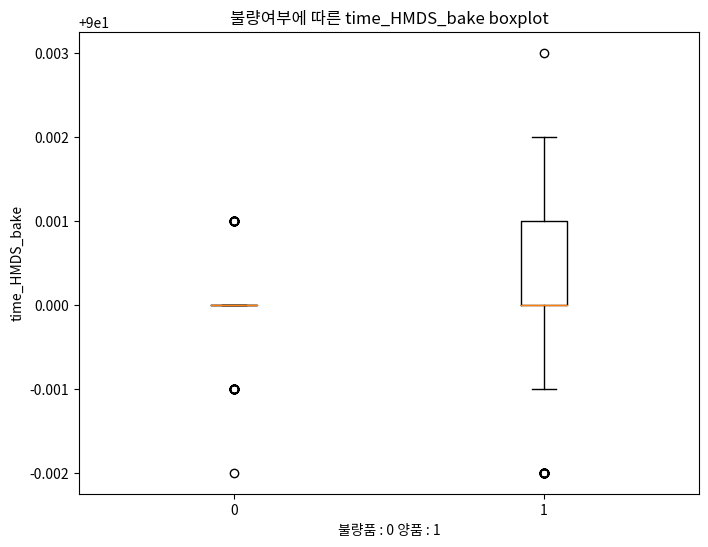

In [194]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['time_HMDS_bake']
data_1 = df_main_para[df_main_para['Target'] == 1]['time_HMDS_bake']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('time_HMDS_bake')
plt.title('불량여부에 따른 time_HMDS_bake boxplot')
plt.show()

# time_HMDS_bake : N2 산화물 흡착이 진행된 시간
# 양품의 범위 : 89.998 ~ 90.003   
# 불량품의 범위 : 89.998 ~ 90.001 
# Insight : 

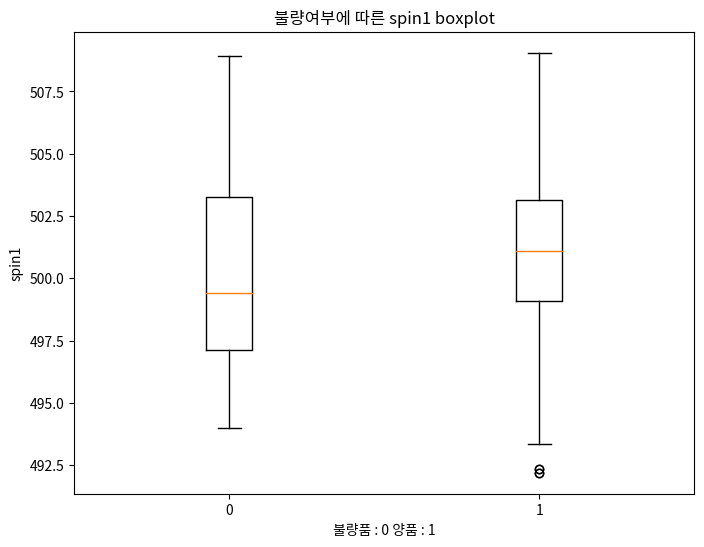

In [195]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['spin1']
data_1 = df_main_para[df_main_para['Target'] == 1]['spin1']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('spin1')
plt.title('불량여부에 따른 spin1 boxplot')
plt.show()

# spin1 : Spin Coat 과정에서 첫 번째 회전 스핀 수 (rpm단위)
# 양품의 범위 : 492.2 ~ 509.06   
# 불량품의 범위 : 493.98 ~ 508.9 
# Insight : 

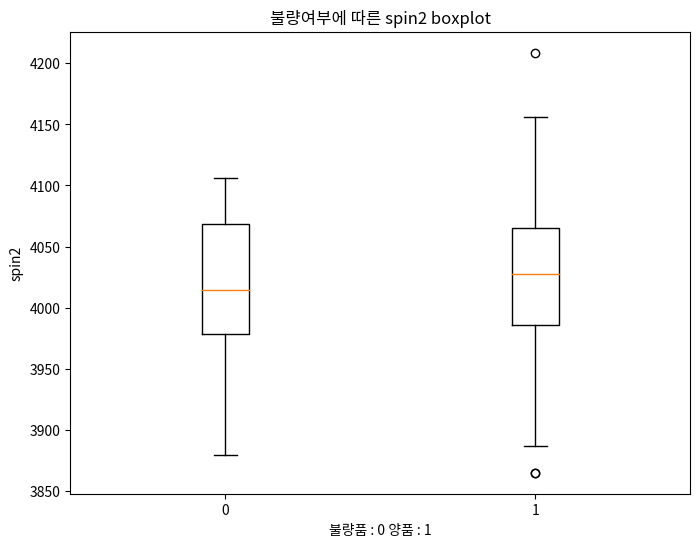

In [196]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['spin2']
data_1 = df_main_para[df_main_para['Target'] == 1]['spin2']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('spin2')
plt.title('불량여부에 따른 spin2 boxplot')
plt.show()
# Spin2 : Spin Coat 과정에서 두 번째 회전 스핀 수
# 양품의 범위 : 3864.82 ~ 4208.68   
# 불량품의 범위 : 3879.66 ~ 4105.86 
# Insight : 

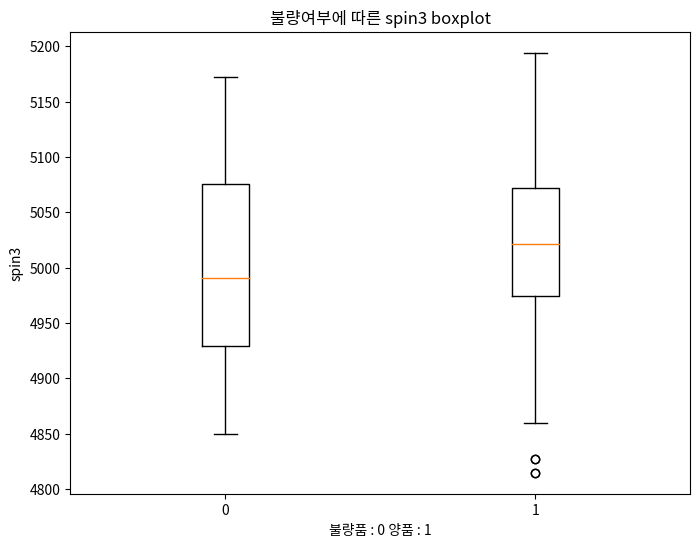

In [197]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['spin3']
data_1 = df_main_para[df_main_para['Target'] == 1]['spin3']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('spin3')
plt.title('불량여부에 따른 spin3 boxplot')
plt.show()
# Spin3 : Spin Coat 과정에서 세 번째 회전 스핀 수
# 양품의 범위 : 4814.62 ~ 5194.13   
# 불량품의 범위 : 4849.57 ~ 5172.08 
# Insight : 

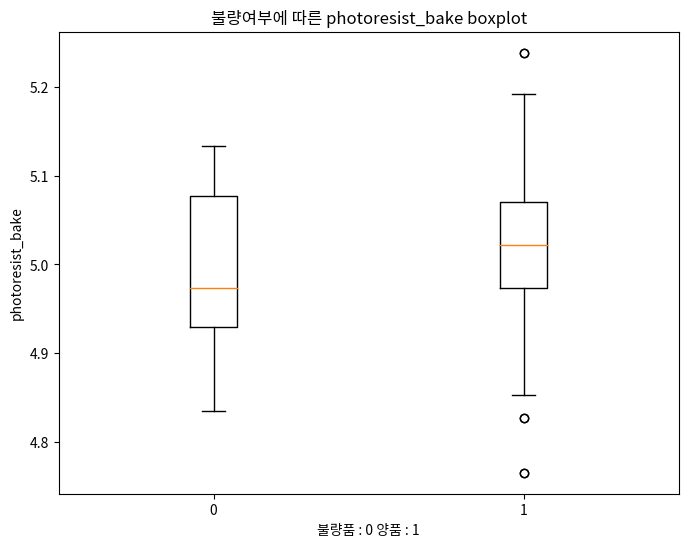

In [198]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['photoresist_bake']
data_1 = df_main_para[df_main_para['Target'] == 1]['photoresist_bake']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('photoresist_bake')
plt.title('불량여부에 따른 photoresist_bake boxplot')
plt.show()
# photoresist_bake : Spin Coating에 투여되는 Photoresist 량
# 양품의 범위 : 4.765 ~ 5.239   
# 불량품의 범위 : 4.835 ~ 5.134 
# Insight : 

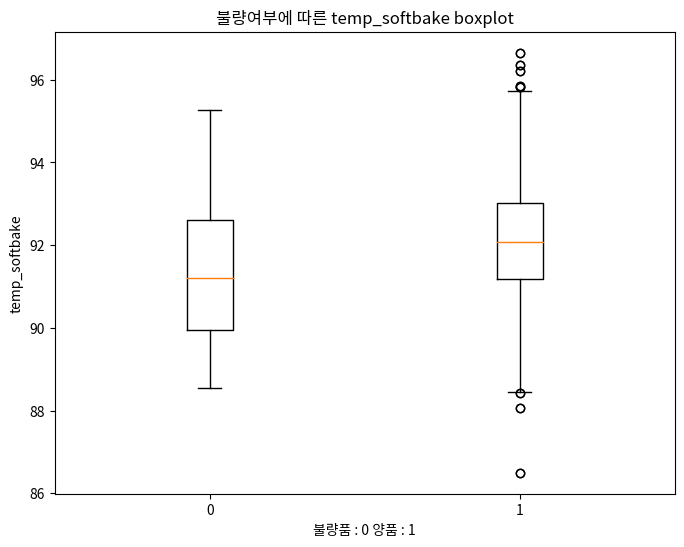

In [199]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['temp_softbake']
data_1 = df_main_para[df_main_para['Target'] == 1]['temp_softbake']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('temp_softbake')
plt.title('불량여부에 따른 temp_softbake boxplot')
plt.show()
# temp_softbake : 투여된 Resist를 흡착시킬 때 발생한 온도
# 양품의 범위 : 86.498 ~ 96.653   
# 불량품의 범위 : 88.551 ~ 95.28
# Insight : 

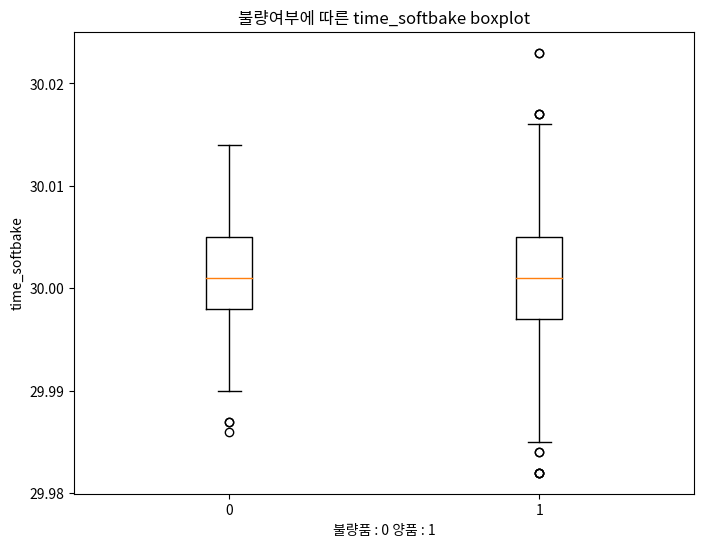

In [200]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['time_softbake']
data_1 = df_main_para[df_main_para['Target'] == 1]['time_softbake']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('time_softbake')
plt.title('불량여부에 따른 time_softbake boxplot')
plt.show()
# time_softbake : 투여된 Resist를 흡착시키는 동안 시간
# 양품의 범위 : 29.982 ~ 30.023   
# 불량품의 범위 : 29.986 ~ 30.014
# Insight : 

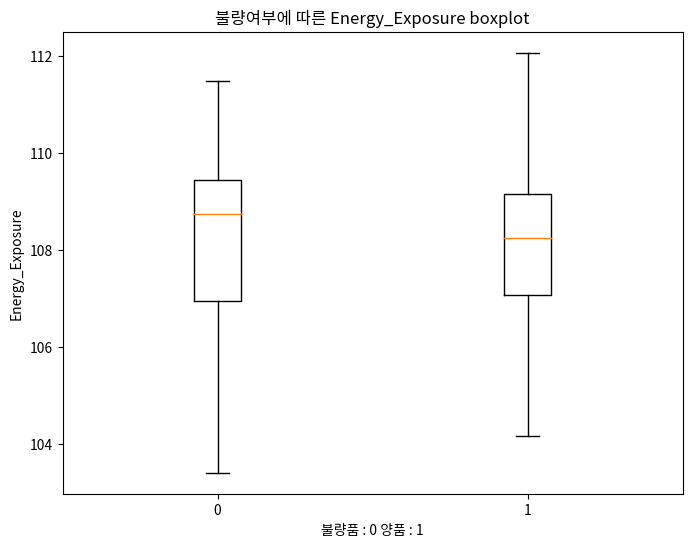

In [201]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['Energy_Exposure']
data_1 = df_main_para[df_main_para['Target'] == 1]['Energy_Exposure']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('Energy_Exposure')
plt.title('불량여부에 따른 Energy_Exposure boxplot')
plt.show()
# Energy_Exposure : exposure energy
# 양품의 범위 : 104.163 ~ 112.069   
# 불량품의 범위 : 103.407 ~ 111.485
# Insight : 

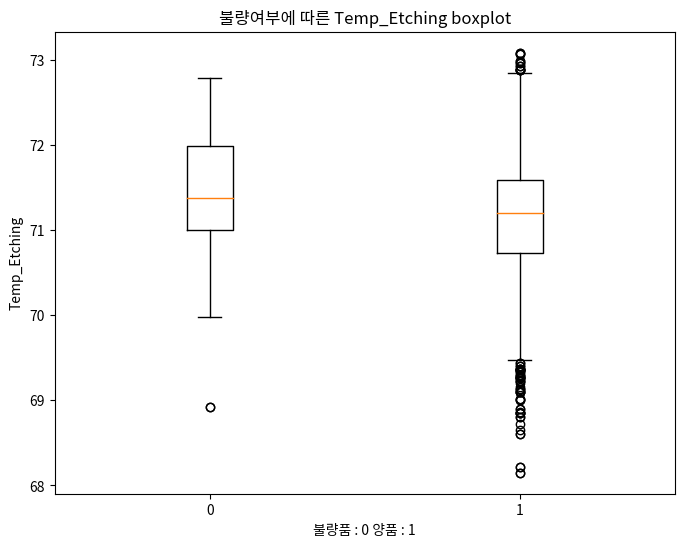

In [202]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['Temp_Etching']
data_1 = df_main_para[df_main_para['Target'] == 1]['Temp_Etching']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('Temp_Etching')
plt.title('불량여부에 따른 Temp_Etching boxplot')
plt.show()
# temp_etching : Etching 공정에서 사용된 온도
# 양품의 범위 : 68.15 ~ 73.081   
# 불량품의 범위 : 68.921 ~ 72.783
# Insight : 

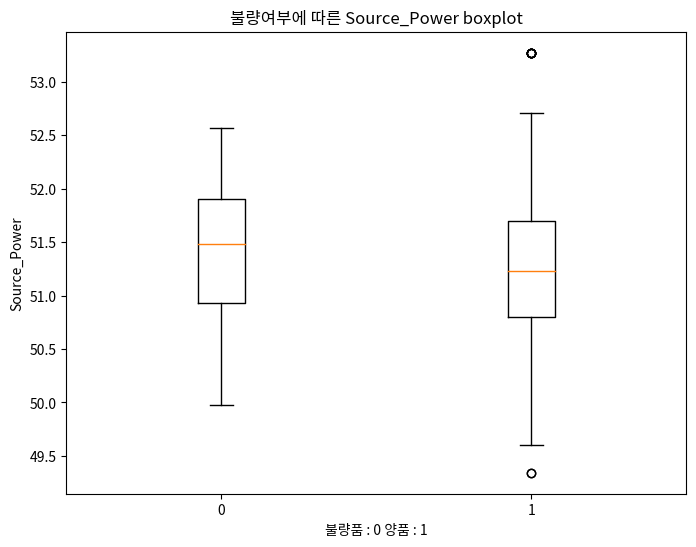

In [203]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['Source_Power']
data_1 = df_main_para[df_main_para['Target'] == 1]['Source_Power']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('Source_Power')
plt.title('불량여부에 따른 Source_Power boxplot')
plt.show()
# Source_Power : Dry Etching Plasma Source Power
# 양품의 범위 : 49.342 ~ 53.272   
# 불량품의 범위 : 49.98 ~ 52.567
# Insight : 

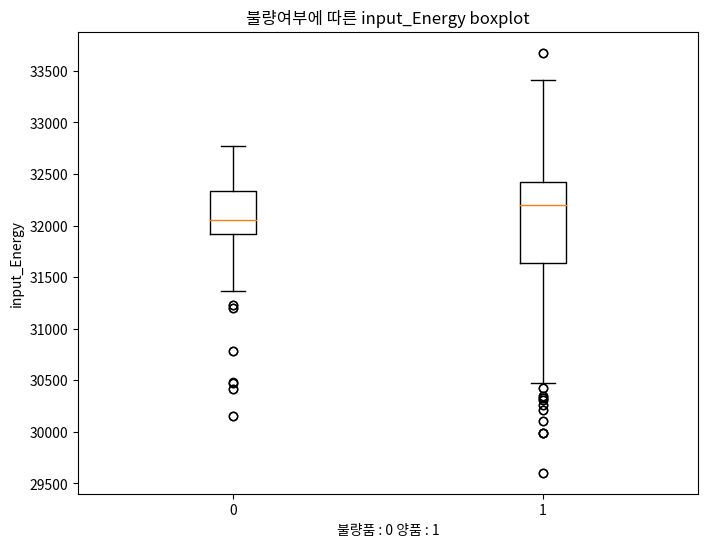

In [204]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['input_Energy']
data_1 = df_main_para[df_main_para['Target'] == 1]['input_Energy']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('input_Energy')
plt.title('불량여부에 따른 input_Energy boxplot')
plt.show()
# input_Energy : 주입 시 사용된 plasma 에너지
# 양품의 범위 : 29604.262 ~ 33675.551   
# 불량품의 범위 : 30152.769 ~ 32773.392
# Insight : 

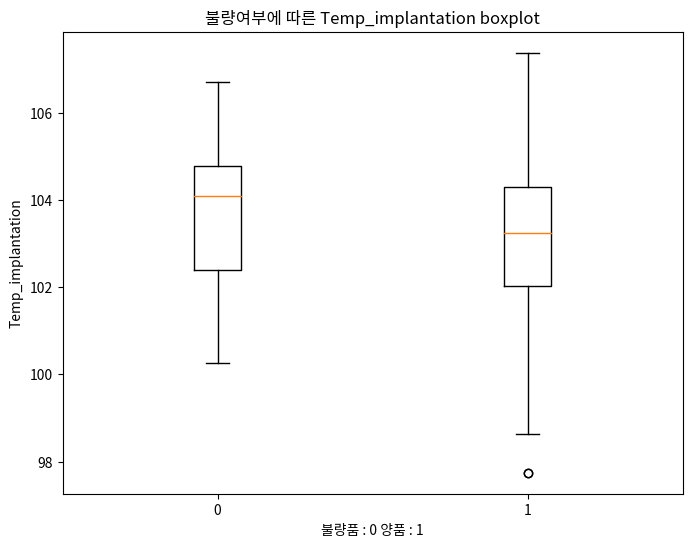

In [205]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['Temp_implantation']
data_1 = df_main_para[df_main_para['Target'] == 1]['Temp_implantation']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('Temp_implantation')
plt.title('불량여부에 따른 Temp_implantation boxplot')
plt.show()
# temp_implantation : Hydrogen Ion 주입 시 Chamber 내 온도
# 양품의 범위 : 97.744 ~ 107.376   
# 불량품의 범위 : 100.254 ~ 106.709
# Insight : 

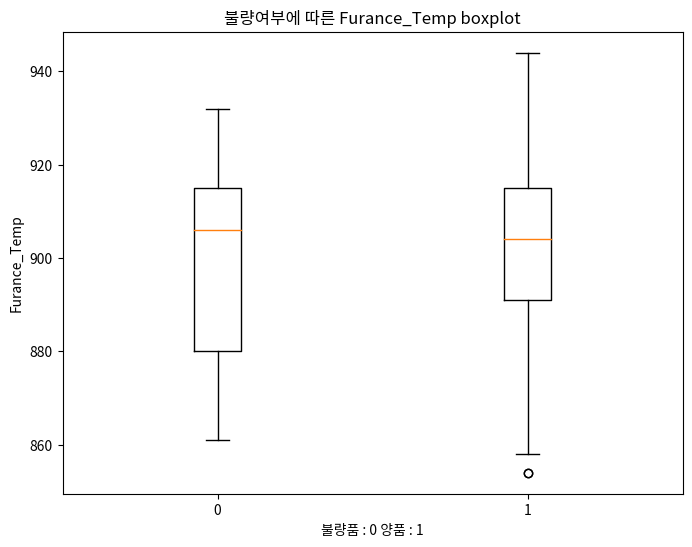

In [206]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['Furance_Temp']
data_1 = df_main_para[df_main_para['Target'] == 1]['Furance_Temp']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('Furance_Temp')
plt.title('불량여부에 따른 Furance_Temp boxplot')
plt.show()
# Furance_Temp : Annealing Furnace 작업 시 Chamber 내 온도
# 양품의 범위 : 854 ~ 944   
# 불량품의 범위 : 861 ~ 932
# Insight : 

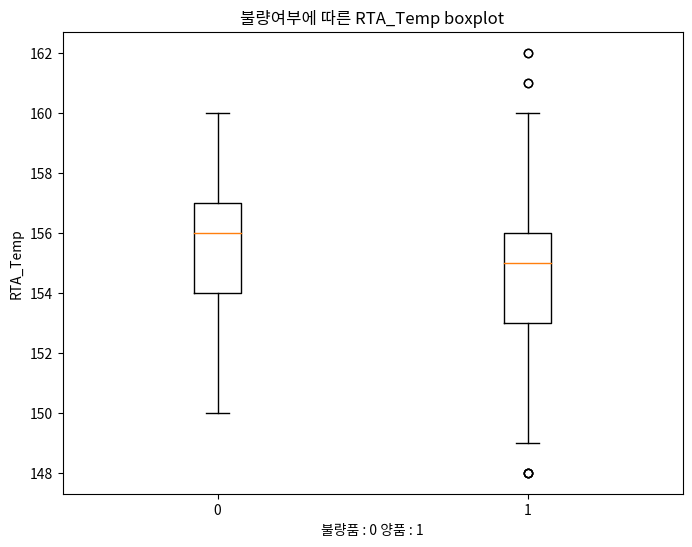

In [207]:
plt.figure(figsize=(8, 6))
data_0 = df_main_para[df_main_para['Target'] == 0]['RTA_Temp']
data_1 = df_main_para[df_main_para['Target'] == 1]['RTA_Temp']
plt.boxplot([data_0, data_1], labels=['0', '1'])
plt.xlabel('불량품 : 0 양품 : 1')
plt.ylabel('RTA_Temp')
plt.title('불량여부에 따른 RTA_Temp boxplot')
plt.show()

# RTA_Temp : RTA 작업 시 Chamber 내 온도
# 양품의 범위 : 148 ~ 162   
# 불량품의 범위 : 150 ~ 160
# Insight : 

In [45]:
param_list=["Temp_OXid","ppm","Pressure","Oxid_time","thickness","resist_target","N2_HMDS",	"pressure_HMDS","temp_HMDS","temp_HMDS_bake","time_HMDS_bake","spin1","spin2","spin3","photoresist_bake","temp_softbake",
            "time_softbake",	"Line_CD",	"Wavelength",	"Resolution",	"Energy_Exposure","Thin F4","Thin F3","Thin F2","Thin F1","Temp_Etching","Source_Power","Selectivity","Flux60s","Flux90s","Flux160s","Flux480s","Flux840s","input_Energy",	
            "Temp_implantation","Furance_Temp", "RTA_Temp",	"Target","Lot_Num",	"Wafer_Num",	"path",	"short_path"]


In [50]:
for param in param_list:

    # plt.figure(figsize=(8, 6))
    data_0 = df_main_para[df_main_para['Target'] == 0][param]
    data_1 = df_main_para[df_main_para['Target'] == 1][param]
    # plt.boxplot([data_0, data_1], labels=['0', '1'])
    # plt.xlabel('불량품 : 1 양품 : 0')
    # plt.ylabel(param)
    # plt.title(f'불량여부에 따른 {str(param)} boxplot')
    # plt.show()

    # 양품
    print("\n\nparam name: ", param)
    sorted_data_1 = data_1.sort_values(ascending=False)
    top_value = sorted_data_1.head(1)
    print(top_value)

    sorted_data_1 = data_1.sort_values(ascending=True)
    top_value = sorted_data_1.head(1)
    print(top_value)

    # 불량
    sorted_data_0 = data_0.sort_values(ascending=False)
    top_value = sorted_data_0.head(1)
    print(top_value)

    sorted_data_0 = data_0.sort_values(ascending=True)
    top_value = sorted_data_0.head(1)
    print(top_value)



param name:  Temp_OXid
5    1311.225435
Name: Temp_OXid, dtype: float64
250    862.011276
Name: Temp_OXid, dtype: float64
1401    1294.52325
Name: Temp_OXid, dtype: float64
355    871.010621
Name: Temp_OXid, dtype: float64


param name:  ppm
54    49.91
Name: ppm, dtype: float64
60    21.07
Name: ppm, dtype: float64
1353    45.88
Name: ppm, dtype: float64
355    21.94
Name: ppm, dtype: float64


param name:  Pressure
229    0.229
Name: Pressure, dtype: float64
247    0.18
Name: Pressure, dtype: float64
933    0.229
Name: Pressure, dtype: float64
52    0.193
Name: Pressure, dtype: float64


param name:  Oxid_time
479    291
Name: Oxid_time, dtype: int64
971    8
Name: Oxid_time, dtype: int64
933    236
Name: Oxid_time, dtype: int64
1404    22
Name: Oxid_time, dtype: int64


param name:  thickness
1126    737.402
Name: thickness, dtype: float64
865    681.435
Name: thickness, dtype: float64
854    727.564
Name: thickness, dtype: float64
1301    695.764
Name: thickness, dtype: float64

